In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
region_num=12
region_names=['Hildesheim','Holzminden','Goslar', 'Höxter','Northeim','Göttingen','Harz','Kassel (LK)','Kassel (SK)', 'Werra-Meißner-Kreis','Eichsfeld','Nordhausen']
labels={}
for intern_region_number in range(region_num):
    labels[intern_region_number]=region_names[intern_region_number]
region_popsize=np.array([275817.,  70458., 136292., 140251., 132285., 326041., 213310.,
       236764., 202137., 100629., 100006.,  83416.])

Import commuter data from www.pendleratlas.de (no database available, write by hand). Note: Commuters from and to non-neighboring districts are not included!

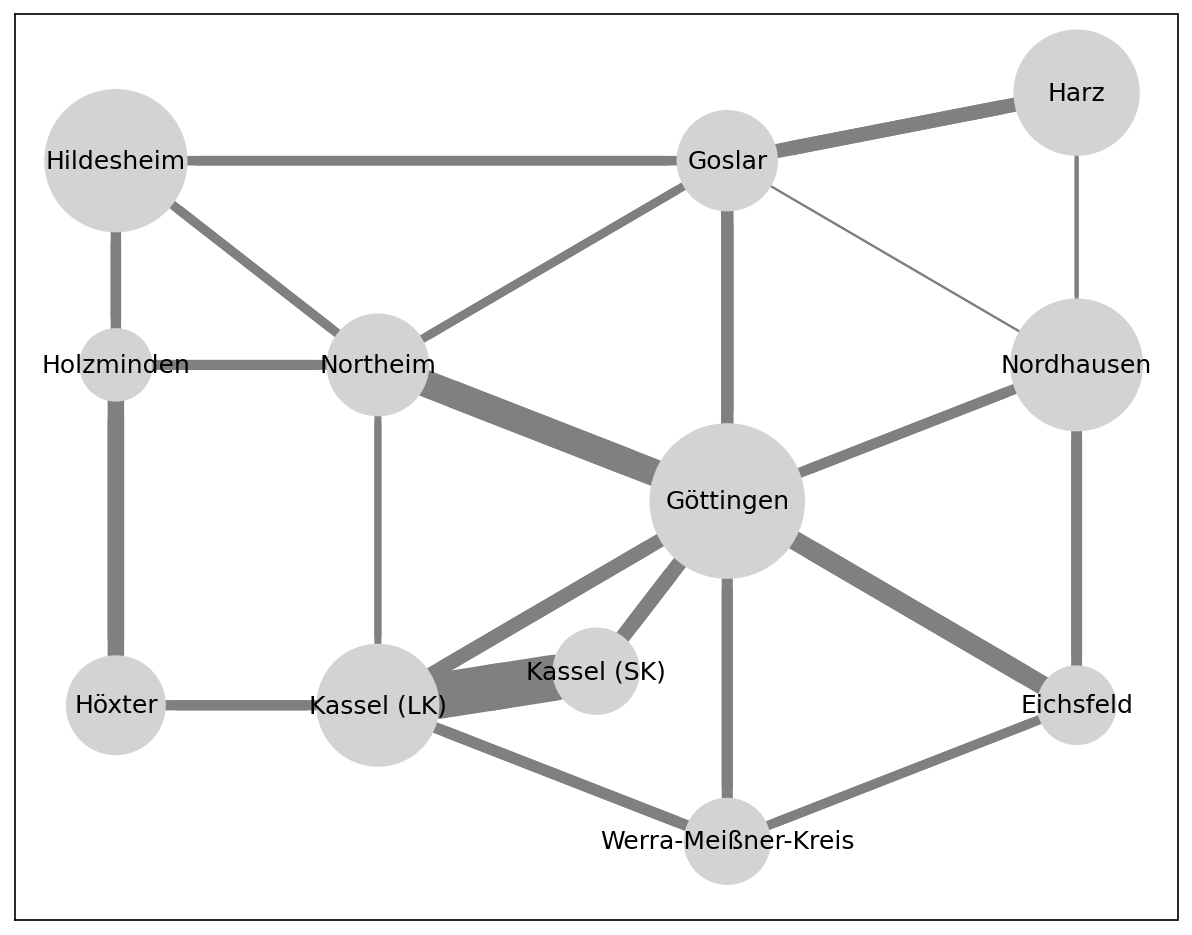

In [3]:
g11_adjacence=np.array([   [0, 1705+805, 802+1316, 0, 1046+863, 0, 0, 0, 0, 0, 0, 0],
                           [1705+805, 0, 0, 3646+2623, 994+1305, 0, 0, 0, 0, 0, 0, 0],
                           [802+1316, 0, 0, 0, 857+809, 1659+1955, 3677+1042, 0, 0, 0, 0, 99+0],
                           [0, 3646+2623, 0, 0, 0, 0, 0, 1313+1116, 0, 0, 0, 0],
                           [1046+863, 994+1305, 857+809, 0, 0, 11166+5710, 0, 611+518, 0, 0, 0, 0],
                           [0, 0, 1659+1955, 0, 11166+5710, 0, 0, 2637+1920, 1633+3551, 2146+710, 7160+1288, 1658+809],
                           [0, 0, 3677+1042, 0, 0, 0, 0, 0, 0, 0, 0, 194+182],
                           [0, 0, 0, 1313+1116, 611+518, 2637+1920, 0, 0, 35268+13753, 912+1950, 0, 0],
                           [0, 0, 0, 0, 0, 1633+3551, 0, 35268+13753, 0, 0, 0, 0],
                           [0, 0, 0, 0, 0, 2146+710, 0, 912+1950, 0, 0, 1486+548, 0],
                           [0, 0, 0, 0, 0, 7160+1288, 0, 0, 0, 1486+548, 0, 984+1755],
                           [0, 0, 99+0, 0, 0, 1658+809, 194+182, 0, 0, 0, 984+1755, 0]])


def makegraph(matrix):
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] != 0: 
                G.add_edge(i,j, weight=matrix[i][j])
    return G

G1=makegraph(g11_adjacence)
weights = [np.sqrt(G1[u][v]['weight']/100) for u,v in G1.edges]

distinct_pos = {0:(0,10),1:(0,7),2:(7,10),3:(0,2),4:(3,7),5:(7,5),6:(11,11),7:(3,2),8:(5.5,2.5),9:(7,0),10:(11,2),11:(11,7)}

plt.figure(figsize=(10,8),dpi=150)
nx.draw_networkx(G1,distinct_pos,node_size=region_popsize/60, labels=labels, with_labels=True, font_color='black', width=weights, node_color='lightgrey' ,edge_color='grey',cmap=plt.cm.YlOrRd,vmin=0, vmax=0.07,arrowsize=1e-10)
#plt.savefig('G12_Network.png')
plt.show()

In [4]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

print (bmatrix(g11_adjacence) + '\n')



\begin{bmatrix}
  0 & 2510 & 2118 & 0 & 1909 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  2510 & 0 & 0 & 6269 & 2299 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
  2118 & 0 & 0 & 0 & 1666 & 3614 & 4719 & 0 & 0 & 0 & 0 & 99\\
  0 & 6269 & 0 & 0 & 0 & 0 & 0 & 2429 & 0 & 0 & 0 & 0\\
  1909 & 2299 & 1666 & 0 & 0 & 16876 & 0 & 1129 & 0 & 0 & 0 & 0\\
  0 & 0 & 3614 & 0 & 16876 & 0 & 0 & 4557 & 5184 & 2856 & 8448 & 2467\\
  0 & 0 & 4719 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 376\\
  0 & 0 & 0 & 2429 & 1129 & 4557 & 0 & 0 & 49021 & 2862 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 5184 & 0 & 49021 & 0 & 0 & 0 & 0\\
  0 & 0 & 0 & 0 & 0 & 2856 & 0 & 2862 & 0 & 0 & 2034 & 0\\
  0 & 0 & 0 & 0 & 0 & 8448 & 0 & 0 & 0 & 2034 & 0 & 2739\\
  0 & 0 & 99 & 0 & 0 & 2467 & 376 & 0 & 0 & 0 & 2739 & 0\\
\end{bmatrix}

